In [1]:
# Step 3: Importing Syft
import syft as sy
sy.VERBOSE = False

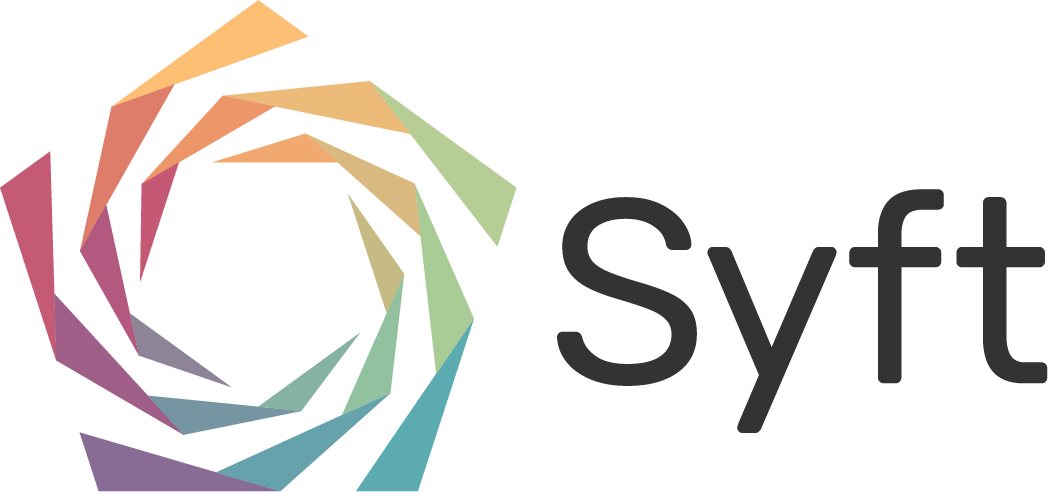

🎤  🎸  ♪♪♪ Starting Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ >             Use at your own risk.
♫♫♫ >
♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-218-7-180.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... DONE!
♫♫♫ >
♫♫♫ > STEP 1: Send the following code to your Duet Partner!

import syft as sy
duet = sy.duet("c2a2facbeab43760bda4213e3d0d7e1e")

♫♫♫ > STEP 2: Running the code above will print out a 'Client ID'.
♫♫♫ >         Have your duet partner send it to you and enter it below!

Running loopback mode. Use sy.join_duet(loopback=True) on the other side.
♫♫♫ > Connecting...
♫♫♫ > ...using a running event loop...

♫♫♫ > CONNECTED!

♫♫♫ > DUET LIVE STATUS  *  Objects: 10  Requests: 0   Messages: 319                                                         > HANDLER Request loss: To evaluate training progress
Value: 0.28096646070480347
♫♫♫ > DUET LIVE STATU

♫♫♫ > DUET LIVE STATUS  -  Objects: 11  Requests: 0   Messages: 4767                                                         > HANDLER Request loss: To evaluate training progress
Value: 6.692780061712256e-06
♫♫♫ > DUET LIVE STATUS  *  Objects: 10  Requests: 0   Messages: 4825                                                         > HANDLER Request loss: To evaluate training progress
♫♫♫ > DUET LIVE STATUS  *  Objects: 10  Requests: 0   Messages: 4832                                
♫♫♫ > DUET LIVE STATUS  -  Objects: 11  Requests: 0   Messages: 4881                                > HANDLER Request loss: To evaluate training progress
Value: 6.4664723140595015e-06
♫♫♫ > DUET LIVE STATUS  *  Objects: 13  Requests: 0   Messages: 4940                                > HANDLER Request loss: To evaluate training progress
Value: 6.369730726873968e-06
♫♫♫ > DUET LIVE STATUS  -  Objects: 11  Requests: 0   Messages: 5001                                > HANDLER Request loss: To evaluate training 

In [2]:
duet = sy.duet(loopback=True)

In [3]:
# from sklearn import datasets
import torch
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('/Users/zarreennaowalreza/Desktop/openmined/PPMH/schrizofrenia_tab_data/final_train.csv')
print(data.shape)
data.head()

(86, 412)


,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,...,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75,Class
0,120873,0.34312,0.045761,-0.13112,0.15034,0.18082,0.289160,0.069545,-0.052489,0.124000,...,-0.982331,1.070363,0.220316,0.776855,-2.022404,1.203256,1.083516,0.564201,-0.002006,1
1,135376,0.28790,0.102570,-0.32343,-0.22776,0.12328,0.367020,-0.084040,0.038793,-0.006287,...,-0.057543,0.371701,-0.513081,-0.457550,1.476216,0.381052,0.163436,0.403782,-0.295125,0
2,139149,0.24585,0.216620,-0.12468,-0.35380,0.16150,-0.002032,-0.133020,-0.035222,0.259040,...,0.597229,1.220756,-0.059213,-0.435494,-0.092971,1.090910,-0.448562,-0.508497,0.350434,0
3,146791,0.42090,0.331380,0.24453,0.17167,0.59223,0.431050,0.280290,0.289620,0.356800,...,0.829697,-0.450726,-0.791032,-1.115821,-0.022296,-0.245844,-0.705539,0.061344,0.448966,0
4,153870,-0.14621,-0.468630,-0.52880,-0.50381,-0.51052,-0.029113,-0.015192,0.360170,0.005944,...,-0.978412,0.158492,0.889753,0.795368,0.738788,0.475415,2.340384,2.516038,-0.551440,1


In [5]:
data['Class'].value_counts()

0    46
1    40
Name: Class, dtype: int64

In [5]:
feat_cols = ['FNC40',
 'FNC33',
 'FNC20',
 'SBM_map67',
 'SBM_map61',
 'SBM_map36',
 'SBM_map17',
 'FNC48',
 'FNC37',
 'FNC353',
 'FNC295',
 'FNC290',
 'FNC279',
 'FNC265',
 'FNC244',
 'FNC243',
 'FNC220',
 'FNC189',
 'FNC185',
 'FNC183',
 'FNC165',
 'FNC13',
 'SBM_map73',
 'SBM_map72',
 'SBM_map7',
 'SBM_map64',
 'SBM_map52',
 'FNC78',
 'FNC5',
 'FNC47',
 'FNC45',
 'FNC43',
 'FNC372',
 'FNC363',
 'FNC342',
 'FNC339',
 'FNC337',
 'FNC313',
 'FNC302',
 'FNC301',
 'FNC30',
 'FNC289',
 'FNC285',
 'FNC278',
 'FNC275',
 'FNC23',
 'FNC213',
 'FNC211',
 'FNC210',
 'FNC177']

target_col = 'Class'

In [ ]:
data_50 = data[feat_cols]
data_50['Class'] = data[target_col]
print(data_50.shape)

In [10]:
train_data = data_50.sample(frac=0.8)
print(train_data.shape)
train_data['Class'].value_counts()

(69, 51)


0    36
1    33
Name: Class, dtype: int64

In [11]:
test_data = data_50.loc[~data_50.index.isin(train_data.index)]
print(test_data.shape)
test_data['Class'].value_counts()

(17, 51)


0    10
1     7
Name: Class, dtype: int64

In [12]:
train_data.to_csv('/Users/zarreennaowalreza/Desktop/openmined/PPMH/schrizofrenia_tab_data/final_train_50.csv', index=None)
test_data.to_csv('/Users/zarreennaowalreza/Desktop/openmined/PPMH/schrizofrenia_tab_data/final_test_50.csv', index=None)

In [6]:
train_data = pd.read_csv('/Users/zarreennaowalreza/Desktop/openmined/PPMH/schrizofrenia_tab_data/final_train_50.csv')
print(train_data.shape)
train_data.head()

(69, 51)


,FNC40,FNC33,FNC20,SBM_map67,SBM_map61,SBM_map36,SBM_map17,FNC48,FNC37,FNC353,...,FNC289,FNC285,FNC278,FNC275,FNC23,FNC213,FNC211,FNC210,FNC177,Class
0,-0.042770,0.21967,0.023462,-0.553621,-0.048894,-0.666222,0.393087,-0.16328,-0.068833,-0.020897,...,0.003765,-0.25555,-0.22028,0.091184,-0.189860,0.094641,0.45274,0.350390,-0.012638,1
1,0.026720,0.82281,-0.146650,-0.300549,-0.030364,-0.336090,0.964257,0.71657,0.447540,-0.227980,...,0.469910,-0.36558,-0.49325,0.013791,0.561350,0.083160,0.48699,0.723200,-0.000896,0
2,-0.081407,0.44264,0.012487,-0.081175,1.332840,1.172378,-1.050905,0.60398,-0.169190,-0.252030,...,0.020654,-0.15788,0.39020,0.213510,-0.090663,0.326170,-0.18757,0.390630,-0.111880,1
3,-0.365520,0.21516,0.195540,0.220316,-0.982331,-1.062109,0.137624,0.22927,-0.086613,-0.230490,...,0.465930,-0.11343,-0.18818,-0.023861,0.338460,0.407870,0.28285,0.231020,0.126880,1
4,-0.054571,0.47644,0.506320,-0.370420,0.313340,0.212350,1.952477,-0.33573,0.198670,-0.266090,...,0.362940,-0.44335,0.13523,0.221310,-0.044503,0.021357,0.37870,0.004384,0.079035,1


In [7]:
X = torch.FloatTensor(np.array(train_data[feat_cols]))
y = torch.FloatTensor(np.array(train_data[target_col]))

In [8]:
y[0:5]

tensor([1., 0., 1., 1., 1.])

In [9]:
X = X.tag("schizophrenia-data")
y = y.tag("schizophrenia-target")

X = X.describe("This is a dataset schizophrenia classification using Source-Based Morphometry (SBM) loadings data from brain maps")
y = y.describe("Class column. 0 = Healthy Control, 1 = Schizophrenic Patient")

In [10]:
data_pointer = X.send(duet, searchable=True)
target_pointer = y.send(duet, searchable=True)

In [11]:
duet.store.pandas

,ID,Tags,Description
0,<UID: b842e14907e24e0c8f1e82a1fc0287ca>,[schizophrenia-data],This is a dataset schizophrenia classification...
1,<UID: 7f8b9ee9a1464efe8100b1b987e94373>,[schizophrenia-target],"Class column. 0 = Healthy Control, 1 = Schizop..."


In [12]:
duet.requests.add_handler(
    name="loss",
    action="accept",
    timeout_secs=-1,  # no timeout
    print_local=True  # print the result in your notebook
)

In [13]:
duet.requests.add_handler(
    name="model_download",
    action="accept"
)

> HANDLER Request loss: To evaluate training progress
Value: 0.6809786558151245
> HANDLER Request loss: To evaluate training progress
Value: 0.6522350907325745
> HANDLER Request loss: To evaluate training progress
Value: 0.6130727529525757
> HANDLER Request loss: To evaluate training progress
Value: 0.5627552270889282
> HANDLER Request loss: To evaluate training progress
Value: 0.5046796798706055
> HANDLER Request loss: To evaluate training progress
Value: 0.4443495273590088
> HANDLER Request loss: To evaluate training progress
Value: 0.3852079510688782
> HANDLER Request loss: To evaluate training progress
Value: 0.33016693592071533
> HANDLER Request loss: To evaluate training progress
Value: 0.23752032220363617
> HANDLER Request loss: To evaluate training progress
Value: 0.19978581368923187
> HANDLER Request loss: To evaluate training progress
Value: 0.16700980067253113
> HANDLER Request loss: To evaluate training progress
Value: 0.13683560490608215
> HANDLER Request loss: To evaluate

> HANDLER Request loss: To evaluate training progress
Value: 8.943723514676094e-06
> HANDLER Request loss: To evaluate training progress
Value: 8.750244887778535e-06
> HANDLER Request loss: To evaluate training progress
Value: 8.570585123379715e-06
> HANDLER Request loss: To evaluate training progress
Value: 8.413383511651773e-06
> HANDLER Request loss: To evaluate training progress
Value: 7.979780093592126e-06
> HANDLER Request loss: To evaluate training progress
Value: 7.857128366595134e-06

> HANDLER Request loss: To evaluate training progress
Value: 7.620459200552432e-06
> HANDLER Request loss: To evaluate training progress
Value: 7.523718068114249e-06
> HANDLER Request loss: To evaluate training progress
Value: 7.250770522659877e-06
> HANDLER Request loss: To evaluate training progress
Value: 7.173032827267889e-06
> HANDLER Request loss: To evaluate training progress
Value: 7.090110557328444e-06
> HANDLER Request loss: To evaluate training progress
Value: 7.01582757756114e-06
> HA